In [30]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from joblib import dump, load

In [9]:
df = pd.read_csv('cars_Cleaned.csv')

In [10]:
X = df.drop('price', axis = 1)
y = df['price']
# nº de features

high_score = 0
# Variable para almacenar las características óptimas
nof = 0
score_list = []
for n in range(1, len(X.columns)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model = LinearRegression()
    rfe = RFE(model, n_features_to_select=n)
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe, y_test)
    score_list.append(score)
    if (score > high_score):
        high_score = score
        nof = n
print("Optimum number of features: %d" %nof)
print("Score (R2) with %d features: %f" % (nof, high_score))

Optimum number of features: 25
Score (R2) with 25 features: 0.726048


In [ ]:
score_list

In [ ]:
X = df.drop("price", axis=1)
y = df['price']

cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, n_features_to_select=25)
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)
temp = pd.Series(rfe.support_, index = cols)
selected_features_rfe = temp[temp==True].index
selected_features_rfe, len(selected_features_rfe)

In [ ]:
selected_features_rfe = selected_features_rfe.append(pd.Index(['Mileage', 'Owners', 'power']))
selected_features_rfe, len(selected_features_rfe)

In [36]:
selected_features_rfe

Index(['Gearbox', 'Comfort_Electrical window lifter',
       'Comfort_Electric tailgate', 'Comfort_Electric side mirrors',
       'Comfort_Start/Stop automatic', 'Comfort_Foldable passenger seat',
       'Comfort_Wind Deflector(for convertible)', 'Comfort_partial rear seat',
       'Entertainment_Bluetooth', 'Entertainment_CD',
       'Entertainment_DAB radio', 'Entertainment_TV',
       'Extras_Alloy rims (18")', 'Extras_Electronic parking brake',
       'Extras_Awning', 'Extras_Paddle shifters', 'Extras_Sports suspension',
       'Security_Passenger airbag', 'Security_Isofix',
       'Security_LED headlights', 'Security_LED daytime running lights',
       'Security_Side_Airbag', 'Security_Power Steering',
       'Security_Traction Control', 'Security_Xenon headlights', 'Mileage',
       'Owners', 'power'],
      dtype='object')

In [26]:
X = df[selected_features_rfe]
y = df['price']
print(X.shape)
print(y.shape)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

(352, 28)
(352,)


In [27]:
linear_model = LinearRegression()
linear_model.fit(X_train_std,y_train)
y_pred = linear_model.predict(X_test_std)
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))

0.9134409917002158
4899637.317834273


In [31]:
dump(linear_model, 'modelo.h5')

['modelo.h5']

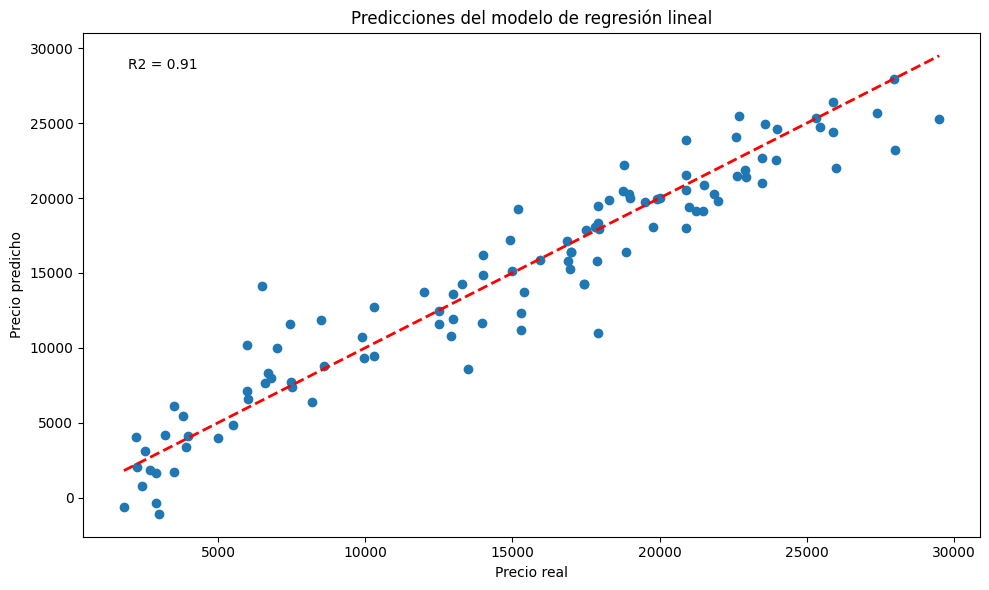

In [28]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel('Precio real')
plt.ylabel('Precio predicho')
plt.title('Predicciones del modelo de regresión lineal')

# Añadir texto con el R2 score
r2 = metrics.r2_score(y_test, y_pred)
plt.text(0.05, 0.95, f'R2 = {r2:.2f}', transform=plt.gca().transAxes, 
         verticalalignment='top')

plt.tight_layout()
plt.show()

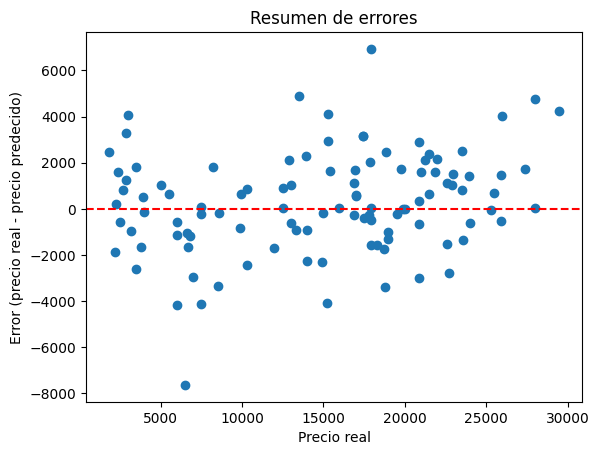

In [29]:
# Crear un gráfico de resumen para visualizar los errores
plt.scatter(y_test, (y_test - y_pred))
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Precio real')
plt.ylabel('Error (precio real - precio predecido)')
plt.title('Resumen de errores')
plt.show()